## Copying the lines from the website that shows how to use DeepInsight. https://alok-ai-lab.github.io/DeepInsight/

In [1]:
!pip install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

  Cloning git://github.com/alok-ai-lab/DeepInsight.git to c:\users\joshi\appdata\local\temp\pip-install-1wuv9avg\deepinsight
  Created wheel for DeepInsight: filename=DeepInsight-0.1.0-py3-none-any.whl size=17399 sha256=cee6d13f11d8453e5a9363aa0969ccb246246a4146c054f0b4b8ab670db6e626
  Stored in directory: C:\Users\joshi\AppData\Local\Temp\pip-ephem-wheel-cache-q_cad343\wheels\52\82\74\388a49d23c8a59b7d399666cc0b6a932a7e8055b9e0f62d21e
Successfully built DeepInsight


  Running command git clone -q git://github.com/alok-ai-lab/DeepInsight.git 'C:\Users\joshi\AppData\Local\Temp\pip-install-1wuv9avg\DeepInsight'


In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
expr_file = r"./tcga.rnaseq_fpkm_uq.example.txt.gz"
expr = pd.read_csv(expr_file, sep="\t")
y = expr['project'].values
X = expr.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)
X_train.shape

(480, 5000)

In [3]:
expr.head()

,project,ENSG00000198886,ENSG00000198938,ENSG00000198712,ENSG00000198804,ENSG00000198695,ENSG00000198899,ENSG00000198763,ENSG00000198727,ENSG00000198840,...,ENSG00000162688,ENSG00000156026,ENSG00000104907,ENSG00000141030,ENSG00000172331,ENSG00000121101,ENSG00000106123,ENSG00000127616,ENSG00000108848,ENSG00000156171
0,BRCA,142443345,205445265,147699305,117404552,19543789,128074538,100669015,78626906,94521528,...,382567,95352,304543,308747,226017,5440,18911,343402,424057,351094
1,BRCA,78709354,135482824,121180246,88804234,39039866,71029840,41166438,62038429,80445271,...,160738,120179,179252,441331,226645,4703,49153,441665,319501,347807
2,BRCA,99604197,117501309,145945037,125820545,29398067,111459668,57571894,72484994,47528866,...,348926,143608,132642,287426,166473,19628,6255,410590,551479,266470
3,BRCA,199000111,166111590,196725218,172250215,48695291,104508816,102453636,108779676,116175259,...,91047,257669,206994,350421,325966,45224,18814,337762,306825,362499
4,BRCA,101196052,165092542,101739391,98060933,30626957,101645175,61853651,86458871,65193762,...,176419,90094,130460,415061,176510,16120,28053,241460,269349,277226


In [4]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

In [5]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)

C:\Users\joshi\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


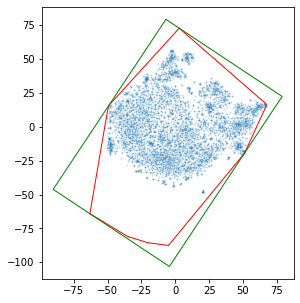

In [6]:
plt.figure(figsize=(5, 5))
it.fit(X_train_norm, plot=True)

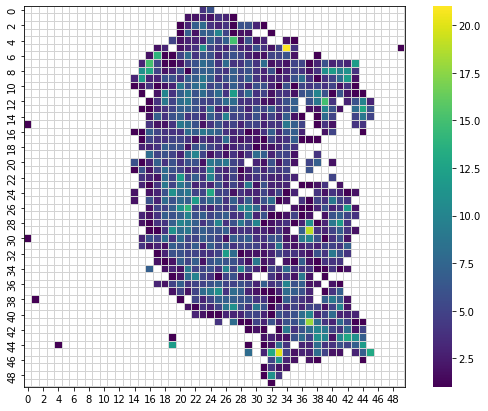

In [7]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

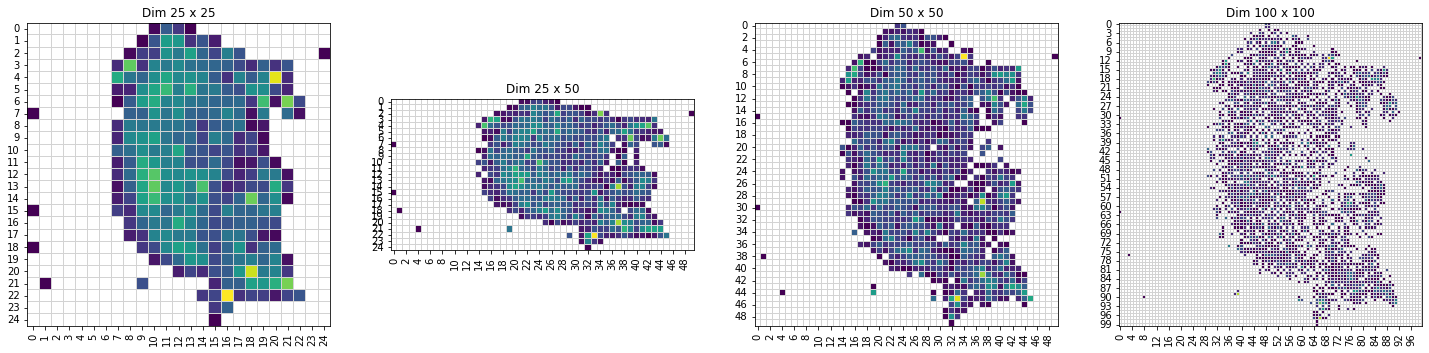

In [8]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)

it.pixels = 50

In [9]:
mat_train = it.transform(X_train_norm)

In [10]:
mat_train.shape

(480, 50, 50, 3)

In [11]:
mat_test = it.transform(X_test_norm)

## Labeling encoding the outcome variable and creating a CNN model as shown in the paper of the DeepInsight.

In [12]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
y_train1 = label.fit_transform(y_train)
y_test1 = label.fit_transform(y_test)

In [13]:
y_train1

array([2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0,
       1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0,
       0, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 0, 1,
       2, 0, 0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1,

In [65]:
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model



def create_convnet(img_path='network_image.png'):
    input_shape = Input(shape=mat_train[0].shape)
    
    # First Parallel Layer
    model1 = (Conv2D(32, (3, 3), activation = 'relu'))(input_shape)
    model1 = BatchNormalization()(model1)
    model1 = (Activation('relu'))(model1)
    model1 = (MaxPool2D())(model1)

    model1 = (Conv2D(32, (3, 3), activation = 'relu'))(model1)
    model1 = BatchNormalization()(model1)
    model1 = (Activation('relu'))(model1)
    model1 = (MaxPool2D())(model1)
    
    model1 = (Conv2D(32, (3, 3), activation = 'relu'))(model1)
    model1 = BatchNormalization()(model1)
    model1 = (Activation('relu'))(model1)
    model1 = (MaxPool2D())(model1)

    model1 = (Conv2D(32, (3, 3), activation = 'relu'))(model1)
    model1 = BatchNormalization()(model1)
    model1 = (MaxPool2D())(model1)
    
    
    
    # Second Parallel Layer
    model2 = (Conv2D(16, (2, 2), activation = 'relu'))(input_shape)
    model2 = BatchNormalization()(model2)
    model2 = (Activation('relu'))(model2)
    model2 = (MaxPool2D())(model2)

    model2 = (Conv2D(16, (2, 2), activation = 'relu'))(model2)
    model2 = BatchNormalization()(model2)
    model2 = (Activation('relu'))(model2)
    model2 = (MaxPool2D())(model2)
    
    
    model2 = (Conv2D(16, (2, 2), activation = 'relu'))(model2)
    model2 = BatchNormalization()(model2)
    model2 = (Activation('relu'))(model2)
    model2 = (MaxPool2D())(model2)

    model2 = (Conv2D(32, (3, 3), activation = 'relu'))(model2)
    model2 = BatchNormalization()(model2)
    model2 = (MaxPool2D())(model2)
    
    merged = concatenate([model1, model2], axis=1)
    out = Dense(200, activation='relu')(merged)
    out = Dense(3, activation='softmax')(out)
    
    model = Model(input_shape, out)
    plot_model(model, to_file=img_path)
    return model

In [66]:
final_model = create_convnet()

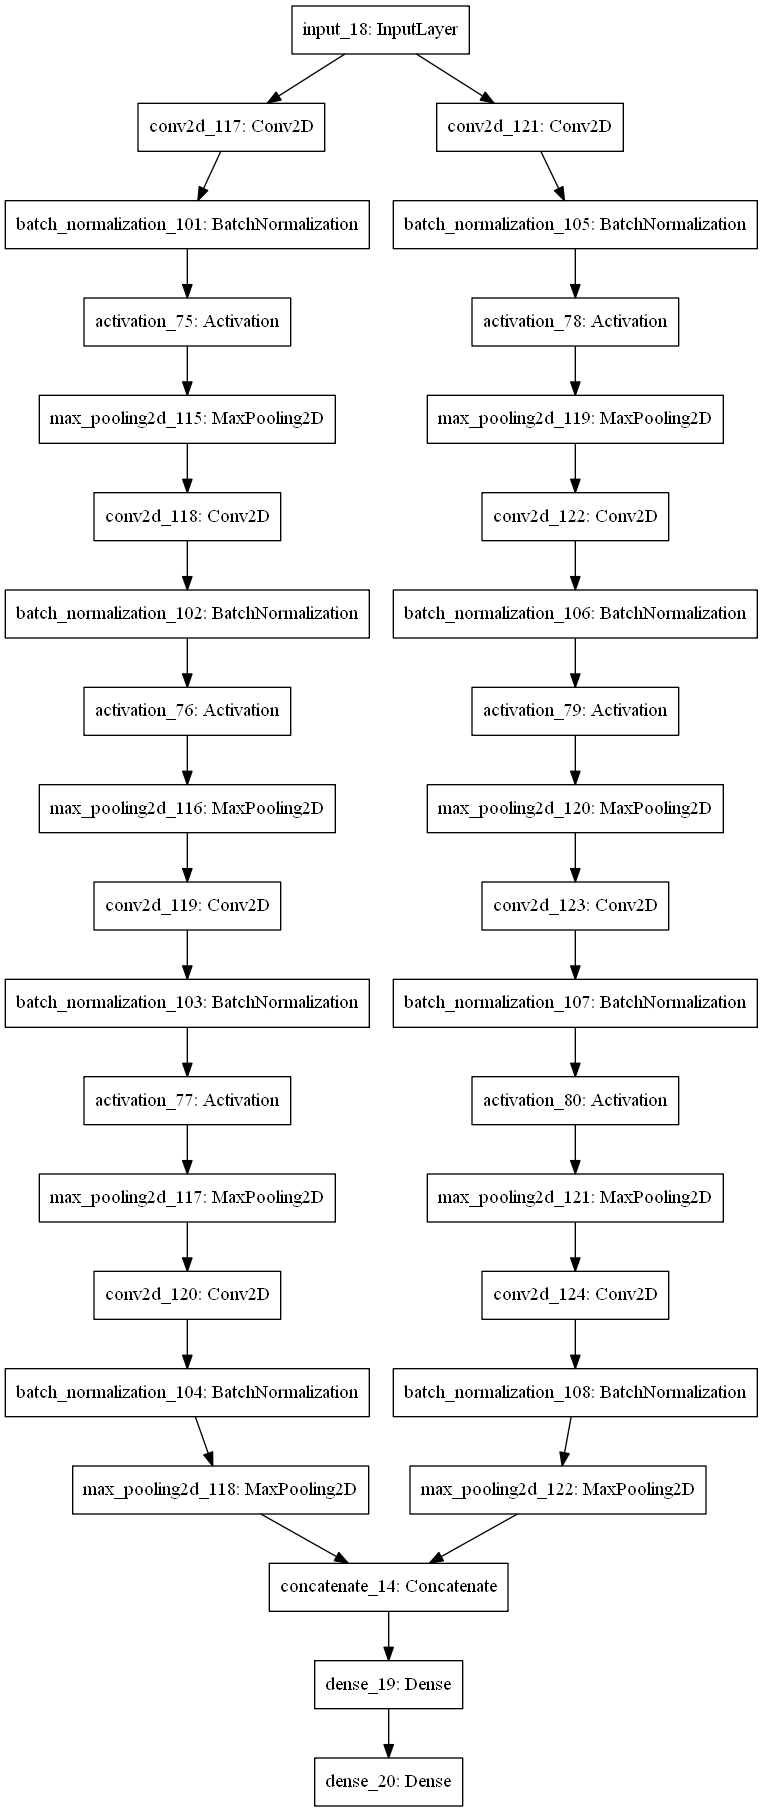

In [67]:
from PIL import Image
img = Image.open('network_image.png')
img

In [ ]:
final_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = final_model.fit(X_train, y_train, epochs = 20, validation_data= (X_test, y_test), verbose=1)

## Reshaping the output that we received from the DeepInsight pipeline so that it can be treated as a convolving filter

In [75]:
k = mat_train[0]

In [77]:
k.shape

(50, 50, 3)

In [105]:
k = k.reshape(50,150)

In [106]:
k.shape

(50, 150)

In [125]:
k

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Importing and reshaping the base image

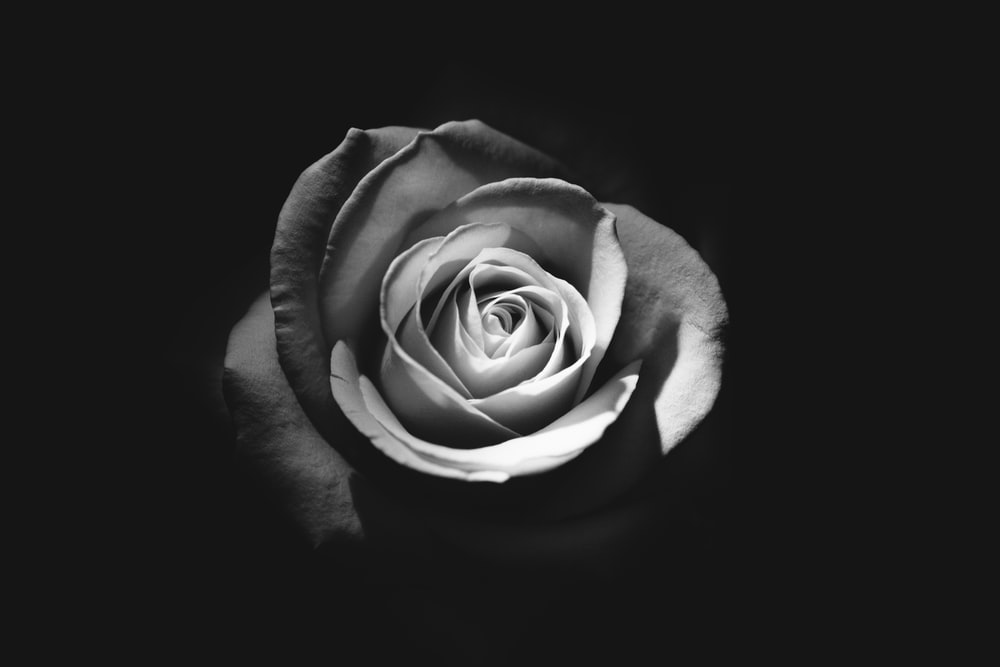

In [124]:
img = Image.open('rose_image.jpg')
img

In [98]:
import numpy as np
from PIL import Image

img = Image.open('rose_image.jpg').convert('RGBA')
arr = np.array(img)

"\n# make a 1-dimensional view of arr\nflat_arr = arr.ravel()\n\n# convert it to a matrix\nvector = np.matrix(flat_arr)\n\n# do something to the vector\nvector[:,::10] = 128\n\n# reform a numpy array of the original shape\narr2 = np.asarray(vector).reshape(shape)\n\n# make a PIL image\nimg2 = Image.fromarray(arr2, 'RGBA')\nimg2.show()\n"

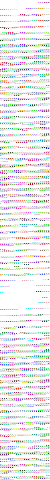

In [130]:
kernel = Image.fromarray(mat_train, 'RGBA')
kernel

In [123]:
arr

array([[[ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        ...,
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255]],

       [[ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        ...,
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255]],

       [[ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        ...,
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255]],

       ...,

       [[ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        ...,
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255]],

       [[ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        ...,
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255],
        [ 21,  21,  21, 255]],

       [[ 21

In [99]:
shape

(667, 1000, 4)

In [103]:
temp_img = arr.reshape(667, 4000)

## Convolving the filter with the base image

In [114]:
import scipy.signal as sig
output = sig.convolve2d(temp_img, k, mode="same")

In [118]:
output.shape

(667, 4000)

In [119]:
output_temp = output.reshape(667, 1000, 4)

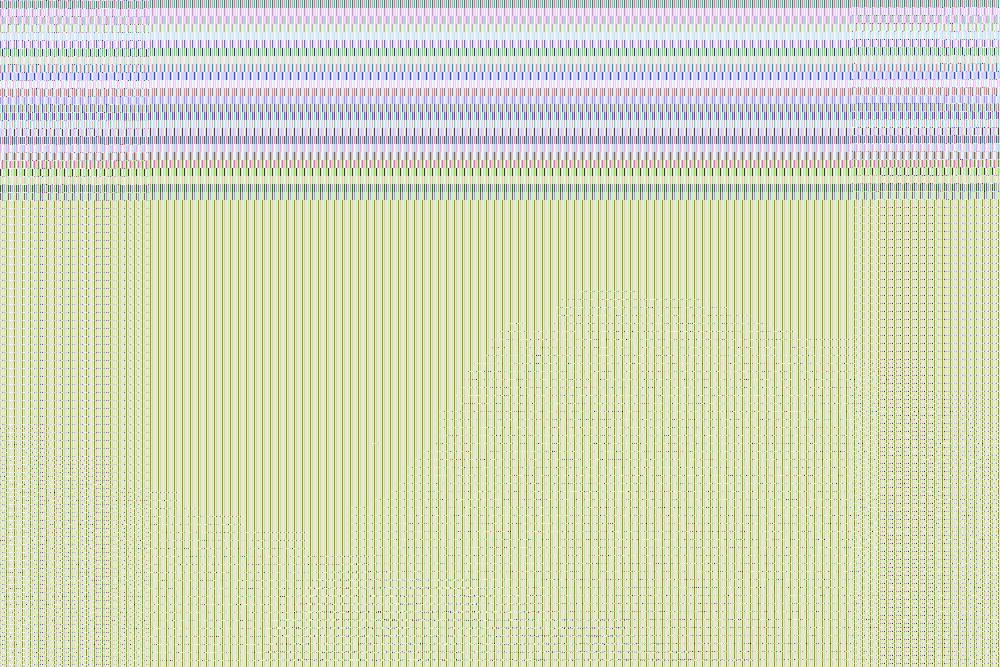

In [121]:
img2 = Image.fromarray(output_temp, 'RGBA')
img2

In [122]:
output_temp

array([[[30007.94805461, 31468.14084491, 32800.86532129, 33910.79803982],
        [34443.51666029, 35906.03403903, 37241.08310384, 38373.19697763],
        [38899.8696081 , 40356.34099683, 41605.78764799, 42725.71470102],
        ...,
        [55474.57566633, 53590.3894511 , 52723.38742561, 52217.56931739],
        [50872.88282388, 48989.80360087, 48123.90856759, 47622.50933173],
        [46268.79966227, 44376.69726331, 43406.331127  , 42910.0279246 ]],

       [[31381.39647697, 33002.55245857, 34226.44227058, 35473.7798391 ],
        [36015.45988838, 37638.4505839 , 38864.17510983, 40127.90460053],
        [40663.69790297, 42280.80185166, 43423.11195351, 44674.90894605],
        ...,
        [58078.2459511 , 56259.58450847, 55249.876872  , 54715.51636572],
        [53272.22277219, 51455.29968825, 50447.33041047, 49925.09595424],
        [48472.81976956, 46646.91409448, 45535.08799569, 45018.07103949]],

       [[32572.14586383, 34358.93644553, 35587.8478959 , 36847.07503811],
        